# Data visualisation

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read in data

In [2]:
credit_df = pd.read_csv('~/documents/Data/Credit Card Fraud Data/credit_card_clean.csv', index_col = 0)

In [3]:
credit_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342474,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160684,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


Separate the fraudulent and non-fraudulent transactions for charting purposes.

In [4]:
credit_fraud_df = credit_df[credit_df['Fraud'] == 1]
credit_non_fraud_df = credit_df[credit_df['Fraud'] == 0]

In [5]:
print(credit_fraud_df.shape)
print(credit_non_fraud_df.shape)

(473, 30)
(275190, 30)


## Visualisation - correlations

This shows the correlations of each of the features variables (i.e. the 28 principle components and the Amount) with the target variable.

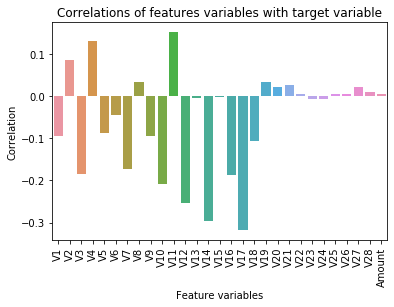

In [8]:
correlations = credit_df.corr()['Fraud'][:-1]
sns.barplot(x = correlations.index, y = correlations.values)
plt.title('Correlations of features variables with target variable')
plt.ylabel('Correlation')
plt.xlabel('Feature variables')
plt.xticks(rotation = 90)
plt.show()

## Visualisation - histogram

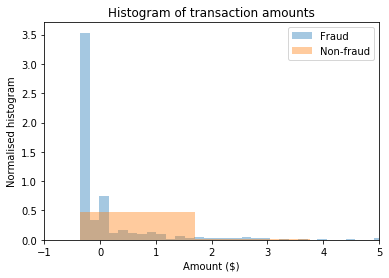

In [6]:
sns.distplot(credit_fraud_df['Amount'], norm_hist = True, kde = False, label = 'Fraud')
sns.distplot(credit_non_fraud_df['Amount'], norm_hist = True, kde = False, label = 'Non-fraud')
plt.xlim(-1, 5)
plt.title('Histogram of transaction amounts')
plt.ylabel('Normalised histogram')
plt.xlabel('Amount ($)')
plt.legend()
plt.show()

The amounts go negative because I standardised this column as part of the data wrangling. This is unintuitive but it does not cause any problems for our purposes.

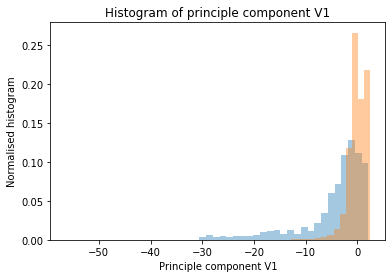

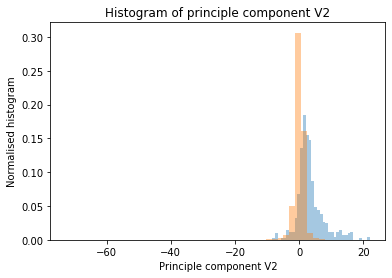

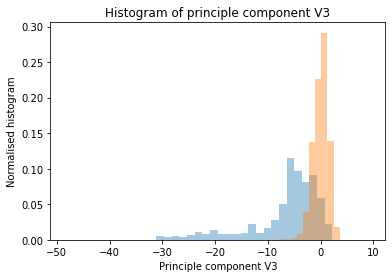

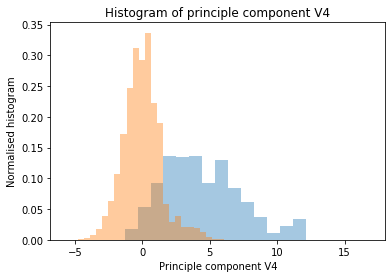

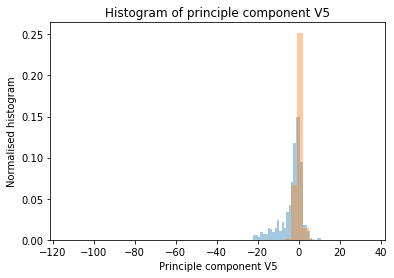

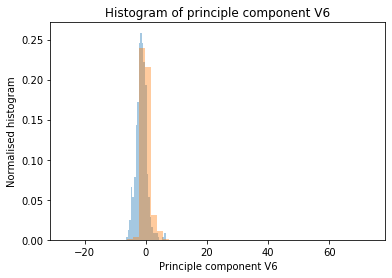

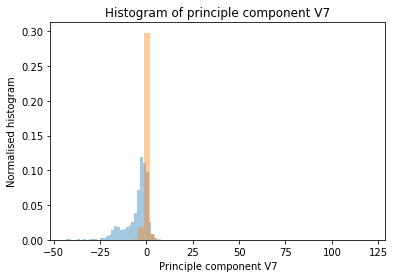

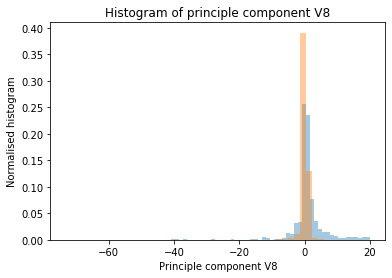

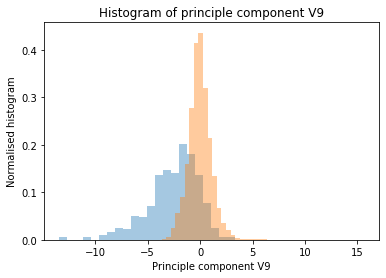

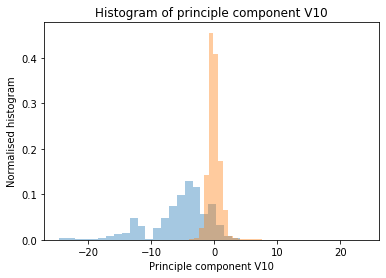

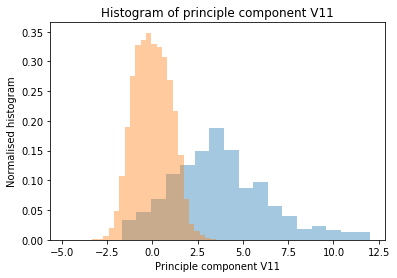

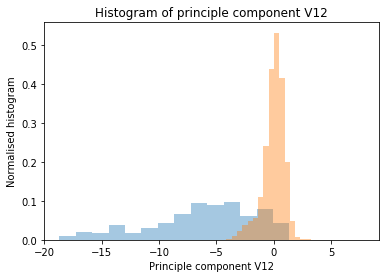

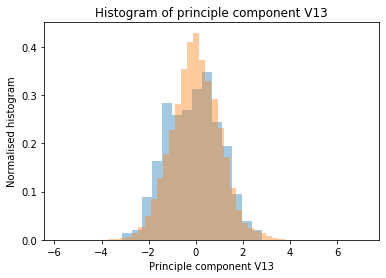

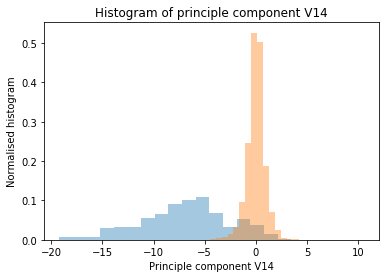

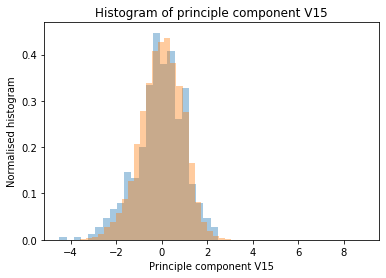

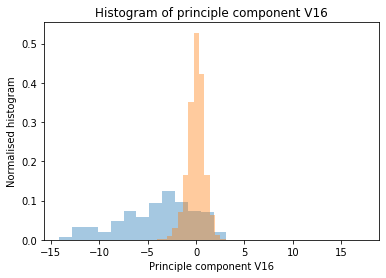

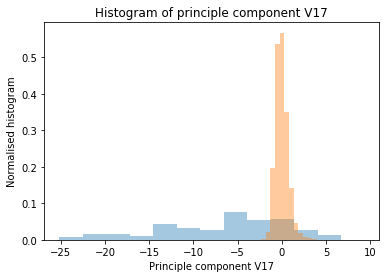

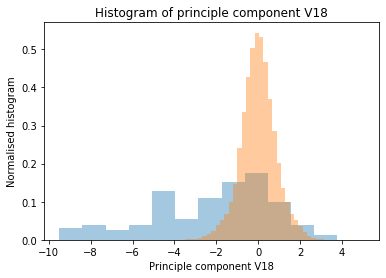

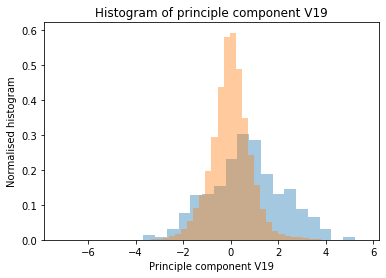

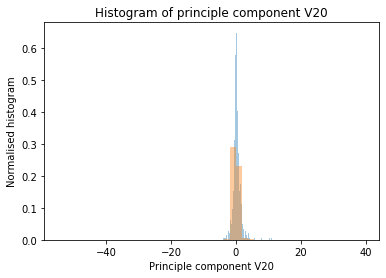

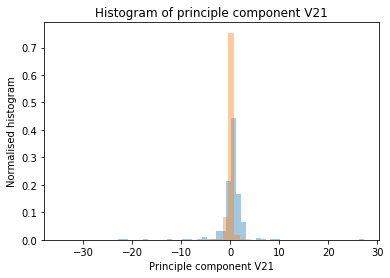

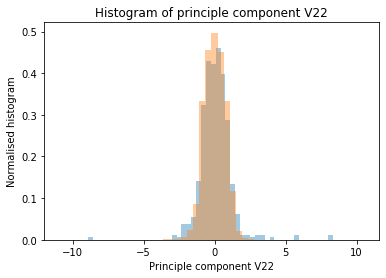

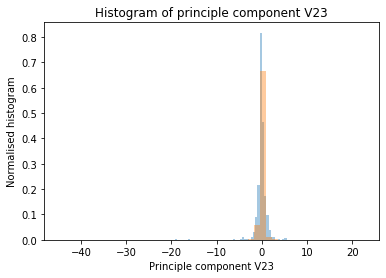

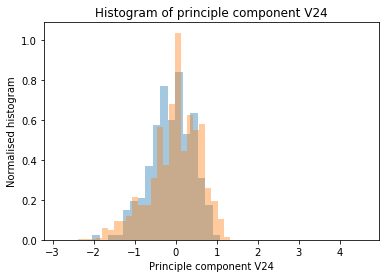

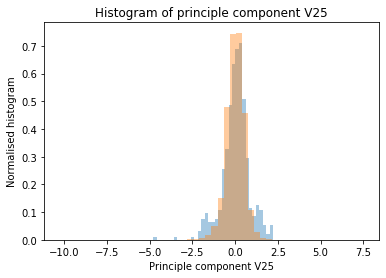

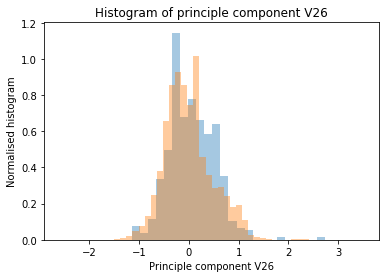

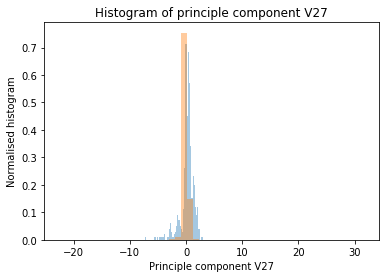

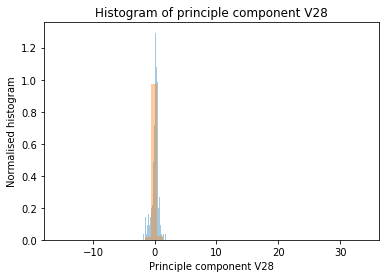

In [7]:
for col in credit_fraud_df.columns[0:28]:
    sns.distplot(credit_fraud_df[col], norm_hist = True, kde = False, label = 'Fraud')
    sns.distplot(credit_non_fraud_df[col], norm_hist = True, kde = False, label = 'Non-fraud')
    plt.title('Histogram of principle component ' + col)
    plt.ylabel('Normalised histogram')
    plt.xlabel('Principle component ' + col)
    plt.show()